In [1]:
import numpy as np
from probatus.metric_uncertainty import VolatilityEstimation
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from probatus.models import lending_club_model
from probatus.datasets import lending_club

### Loading Data

Loading test data from lending club

In [2]:
# loading a dummy model
model = lending_club_model()

# loading original data
data = lending_club(modelling_mode = False)[0]
y = data[['default']]
X = data.drop(['id', 'loan_issue_date','default'], axis = 1)

# defining the metrics we are interested in
evaluators =  {'AUC' : [roc_auc_score,'proba']}

### Running Uncertainty Evaluation

First fitting the localised bootstrap replicates with overlap

In [3]:
# declaring the evaluation class
checker = VolatilityEstimation(model, X, y, evaluators, 'boot_seed')

# running 1000 random samples with 40% of data assigned to test partition
checker.estimate(0.4,1000)

In [4]:
checker.reporting('AUC')

Mean of metric on train is 0.92
Mean of metric on test is 0.71
Mean of delta is 0.21
Standard Deviation of metric on train is 0.00942
Standard Deviation of metric on test is 0.01951
Standard Deviation of delta is 0.02275


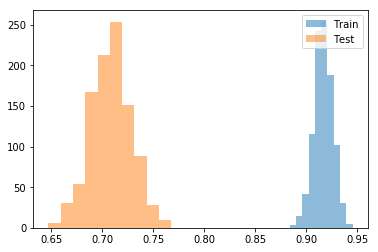

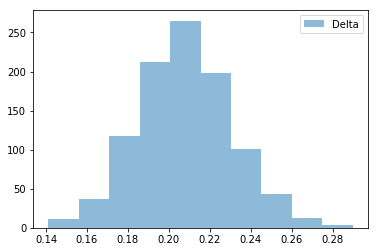

In [5]:
checker.plot('AUC')

Running the estimation with global bootrap non overlapping k folds. 

The number of max folds is determined by the nature of the data: what is the maximum number of folds to ensure there is balanced number of classed in each fold.

In [6]:
# declaring the evaluation class
checker = VolatilityEstimation(model, X, y, evaluators, 'boot_global')

# running 1000 random samples with 40% of data assigned to test partition
checker.estimate(0.1)

In [7]:
checker.reporting('AUC')

Mean of metric on train is 0.98
Mean of metric on test is 0.63
Mean of delta is 0.35
Standard Deviation of metric on train is 6e-05
Standard Deviation of metric on test is 0.00099
Standard Deviation of delta is 0.0009


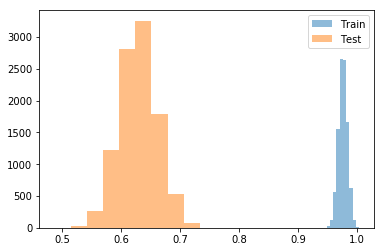

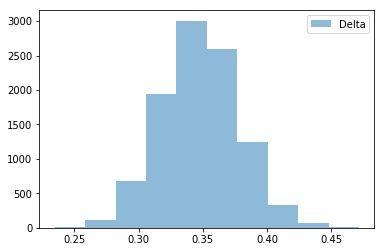

In [8]:
checker.plot('AUC')

In [9]:
# declaring the evaluation class
checker = VolatilityEstimation(model, X, y, evaluators, 'delong')

checker.estimate(0.4)

In [10]:
checker.reporting('AUC')

Mean of metric on train is 0.93
Mean of metric on test is 0.69
Mean of delta is 0.24
Standard Deviation of metric on train is 0.0001
Standard Deviation of metric on test is 0.00083
Standard Deviation of delta is 0.0


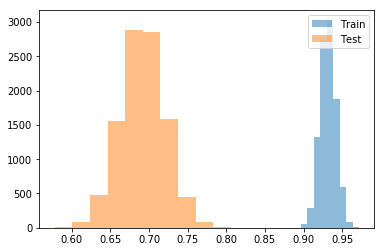

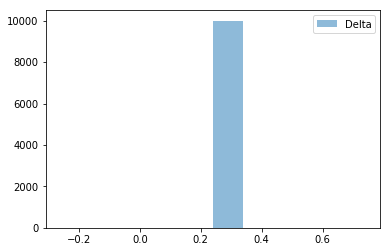

In [11]:
checker.plot('AUC')